## Imports & Load data:

In [59]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer


# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce

import seaborn as sns
sns.set()

pd.pandas.set_option('display.max_columns', None)

In [60]:
%matplotlib inline

In [61]:
# load dataset
data = pd.read_csv('C:/Users/Shamika/Downloads/Udemy Feature Engineering/Dataset/housing.csv')

print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Types of variables:

In [62]:
# categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

In [63]:
# numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

In [64]:
# variables that contain year information

year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

In [65]:
# discrete variables

discrete = []

for var in numerical:
    if len(data[var].unique()) < 20 and var not in year_vars:
        discrete.append(var)

In [66]:
# continuous variables

numerical = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] 
             and var not in year_vars]

## Finding Missing data & Imputation methods:

### 1. Numerical variables:

In [67]:
#Missing Data - Numerical

for var in numerical:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
MasVnrArea 0.005479452054794521


**Imputation method: additional variable with NA + median imputation**

### 2. Discrete variables:

In [68]:
#Missing Data - Discrete

for var in discrete:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

**No missing data for discrete variables.**

### 3. Year Variables:

In [69]:
for var in year_vars:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

GarageYrBlt 0.05547945205479452


In [70]:
#Total number of records missing:
print(f'Missing records: {data.GarageYrBlt.isnull().sum()}')

Missing records: 81


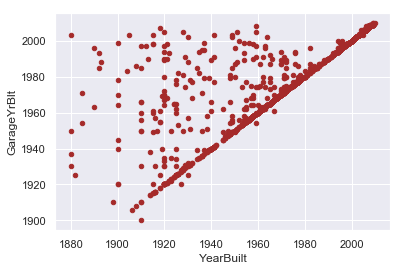

In [28]:
#Relation between YearBuilt & GarageYrBlt

data.plot(x='YearBuilt',y='GarageYrBlt',kind='scatter',color='brown')

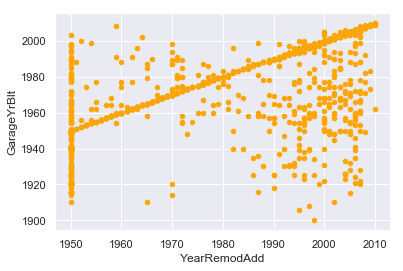

In [30]:
#Relation between YearRemodAdd & GarageYrBlt

data.plot(x='YearRemodAdd',y='GarageYrBlt',kind='scatter', color='orange')

In [32]:
#Total records where GarageYrBlt is same as YearBuilt

print('GarageYrBlt same as YearBuild: {}'.format(len(data['GarageYrBlt'][data['GarageYrBlt']==data['YearBuilt']])))

print()
#Total records where GarageYrBlt is same as YearRemodAdd 

print('GarageYrBlt same as YearRemodAdd: {}'.format(len(data['GarageYrBlt'][(data['GarageYrBlt']==data['YearRemodAdd']) & (data['GarageYrBlt']!=data['YearBuilt'])])))

GarageYrBlt same as YearBuild: 1089

GarageYrBlt same as YearRemodAdd: 54


**For majority of houses, *GarageYrBlt* is same as the year house was built - *YearBuild*.**

This can be used to replace the missing records.

### 4. Categorical

In [33]:
#Missing Data - categorical

print('All categorical missing values')
print('-------------------------------------')

for var in categorical:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean(), '-->', data[var].isnull().sum())

All categorical missing values
------------------------------------
Alley 0.9376712328767123 --> 1369
MasVnrType 0.005479452054794521 --> 8
BsmtQual 0.025342465753424658 --> 37
BsmtCond 0.025342465753424658 --> 37
BsmtExposure 0.026027397260273973 --> 38
BsmtFinType1 0.025342465753424658 --> 37
BsmtFinType2 0.026027397260273973 --> 38
Electrical 0.0006849315068493151 --> 1
FireplaceQu 0.4726027397260274 --> 690
GarageType 0.05547945205479452 --> 81
GarageFinish 0.05547945205479452 --> 81
GarageQual 0.05547945205479452 --> 81
GarageCond 0.05547945205479452 --> 81
PoolQC 0.9952054794520548 --> 1453
Fence 0.8075342465753425 --> 1179
MiscFeature 0.963013698630137 --> 1406


* For the categorical variables that have **more than or equal to 50%** of data missing, adding ***'Missing'*** label to fill in the missing values:

```
Alley --> 1369
FireplaceQu --> 690
PoolQC --> 1453
Fence --> 1179
MiscFeature --> 1406 
```

* For the variables having **less** amount of data missing, filling in the missing data by **Frequent category**.

```
MasVnrType --> 8
BsmtQual --> 37
BsmtCond --> 37
BsmtExposure --> 38
BsmtFinType1 --> 37
BsmtFinType2 --> 38
Electrical --> 1
```

In [ ]:
#To be imputed using "Missing"
majority_missing = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']

#To be imputed by "most frequent"
minority_missing = ['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']

* All the **"Garage"** variables for which data is missing seem to related to ***GarageYrBlt*** year_var which will be imputed by ***YearBuilt*** variable.
* Imputing it's related variables by the most frequent values based on ***YearBuilt***.

```
GarageType --> 81
GarageFinish --> 81
GarageQual --> 81
GarageCond --> 81
```

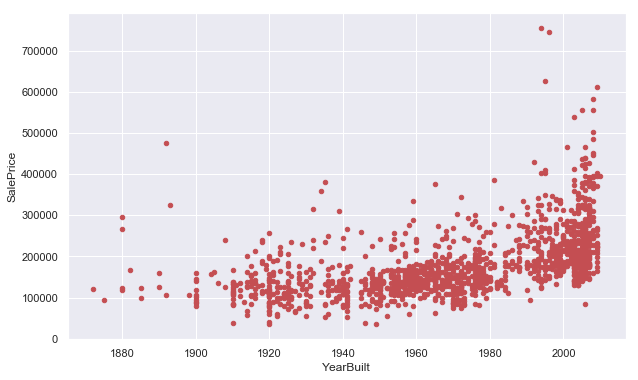

In [37]:
# Plot the relation between YearBuilt & SalePrice

data.plot('YearBuilt','SalePrice',kind='scatter',figsize=(10,6),c='r')

Finding the appropriate **most frequent** value for each *"Garage"* variable based on the year house was built, so as to fill in the missing value in these variables with correlation.

**GarageType:**

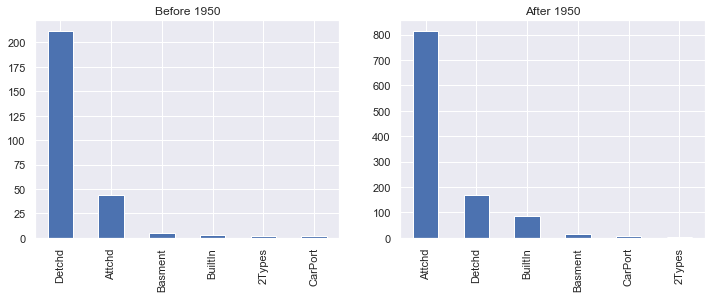

In [38]:
fig, ax = plt.subplots(1,2)
data['GarageType'][data.YearBuilt < 1950].value_counts().plot(kind='bar',ax=ax[0],title='Before 1950',figsize=(12,4))
data['GarageType'][data.YearBuilt > 1950].value_counts().plot(kind='bar',ax=ax[1],title='After 1950',figsize=(12,4))

For variable - **GarageType**,

If *YearBuilt > 1950*: most frequent is **Detchd**

If *YearBuilt > 1950*: most frequent is **Attchd**

**GarageFinish**

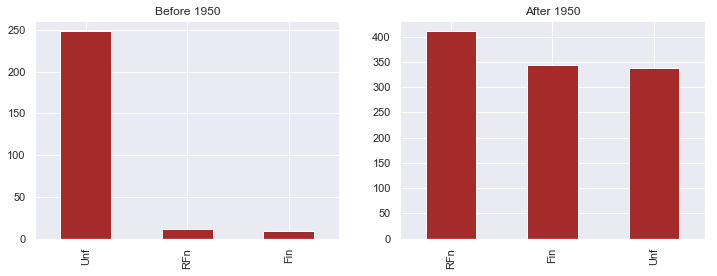

In [39]:
fig, ax = plt.subplots(1,2)
data['GarageFinish'][data.YearBuilt < 1950].value_counts().plot(kind='bar',ax=ax[0],figsize=(12,4),title='Before 1950',color='brown')
data['GarageFinish'][data.YearBuilt > 1950].value_counts().plot(kind='bar',ax=ax[1],figsize=(12,4),title='After 1950',color='brown')

For variable - **GarageFinish**,

If *YearBuilt > 1950*: impute with **Unf**

If *YearBuilt > 1950*: impute with **RFn**

**GarageCond**

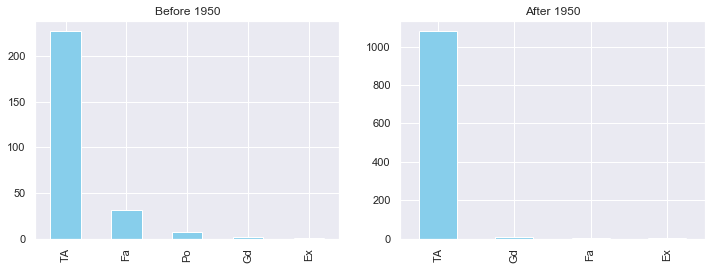

In [40]:
fig, ax = plt.subplots(1,2)
data['GarageCond'][data.YearBuilt < 1950].value_counts().plot(kind='bar',ax=ax[0],figsize=(12,4),title='Before 1950',color='skyblue')
data['GarageCond'][data.YearBuilt > 1950].value_counts().plot(kind='bar',ax=ax[1],figsize=(12,4),title='After 1950',color='skyblue')

For variable **GarageCond**,

Most frequent value is same for both before and after 1950: **TA**.

**GarageQual**

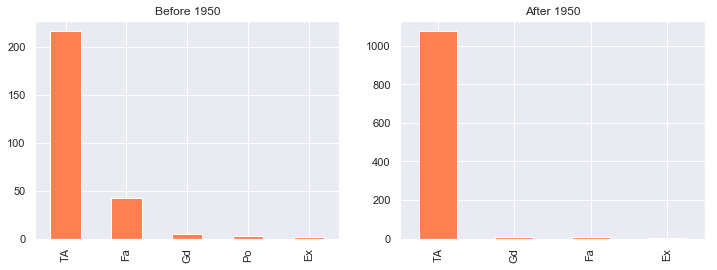

In [41]:
fig, ax = plt.subplots(1,2)
data['GarageQual'][data.YearBuilt < 1950].value_counts().plot(kind='bar',ax=ax[0],figsize=(12,4),title='Before 1950',color='coral')
data['GarageQual'][data.YearBuilt > 1950].value_counts().plot(kind='bar',ax=ax[1],figsize=(12,4),title='After 1950',color='coral')

For variable **GarageQual**,

Most frequent value is same for both before and after 1950: **TA**

## **Train-Test Split:**

In [122]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

In [123]:
X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

## Preprocessing:

In [124]:
#GarageYrBlt missing --> YearBuilt
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(X_train['YearBuilt'])
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(X_test['YearBuilt'])

#GarageType --> Most Frequent based on GarageYrBlt
X_train['GarageType'] = X_train['GarageType'].fillna(X_train.apply(lambda x: 'Attchd' if x['GarageYrBlt'] > 1950 else 'Detchd',axis=1))
X_test['GarageType'] = X_test['GarageType'].fillna(X_test.apply(lambda x: 'Attchd' if x['GarageYrBlt'] > 1950 else 'Detchd',axis=1))

#GarageFinish --> Most Frequent based on GarageYrBlt
X_train['GarageFinish'] = X_train['GarageFinish'].fillna(X_train.apply(lambda x: 'Unf' if x['GarageYrBlt'] > 1950 else 'RFn',axis=1))
X_test['GarageFinish'] = X_test['GarageFinish'].fillna(X_test.apply(lambda x: 'Unf' if x['GarageYrBlt'] > 1950 else 'RFn',axis=1))

In [97]:
#function to calculate elapsed time
def elapsed_years(df, var):
    df[var] = df['YrSold'] - df[var]
    return df

In [125]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [126]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [110]:
mode_variables = minority_missing+['GarageQual','GarageCond']

In [101]:
def fill_na_with_mode(df):
    for col in df.columns:
        if col in mode_variables:
            df[col].fillna(df[col].mode()[0],inplace=True)
    return df

In [79]:
def to_object(df):
    for col in numerical:
        df[col] = df[col].astype(object)
    return df

## Pipeline:

In [127]:
house_pipe = Pipeline([

    # missing data imputation 
    ('missing_ind', mdi.AddNaNBinaryImputer(variables=['LotFrontage', 'MasVnrArea'])),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median', variables=['LotFrontage', 'MasVnrArea'])),
    ('imputer_mode',FunctionTransformer(fill_na_with_mode,validate=False)),
    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),
    
    # categorical encoding 
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(tol=0.05, n_categories=6, variables=categorical+discrete)),
    ('categorical_enc', ce.OrdinalCategoricalEncoder(encoding_method='ordered', variables=categorical+discrete)),

    # discretisation + encoding 
    ('discretisation', dsc.DecisionTreeDiscretiser(cv=3, scoring='neg_mean_squared_error', variables=numerical,
                                       param_grid={'max_depth': [1, 2, 3],'min_samples_leaf':[10,4]},regression=True)),

    # feature Scaling 
    ('scaler', StandardScaler()),
    
    # regression
    ('lasso', Lasso(random_state=0))
])

In [128]:
house_pipe.fit(X_train, y_train)
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

C:\Users\Shamika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shamika\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Shamika\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Shamika\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [129]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 733561042.1547126
train rmse: 27084.332041878246
train r2: 0.8825142866343709

test mse: 1377570296.4581347
test rmse: 37115.63412442437
test r2: 0.7995420276003983
